OVER SAMPLING

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
# Load data from CSV
csv_link = "https://raw.githubusercontent.com/hastricantya/OTA/main/oversampled_data.csv"  # Replace with your CSV file link
data = pd.read_csv(csv_link)

In [ ]:
# Find the number of data points
num_data_points = data.shape[0]
print("Number of data points:", num_data_points)

Number of data points: 1560


In [ ]:
# Assuming your CSV has a 'text' column for input text and a 'label' column for labels
X = data['Content']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Initialize and train K-Nearest Neighbors classifier
k = 6 # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_tfidf)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.71      1.00      0.83       277
    Positive       1.00      0.01      0.02       113

    accuracy                           0.71       390
   macro avg       0.86      0.50      0.42       390
weighted avg       0.80      0.71      0.60       390



In [ ]:
# Optionally, you can input new text and get predictions
new_text = ["This is a new text to classify"]
new_text_tfidf = tfidf_vectorizer.transform(new_text)
new_prediction = knn_classifier.predict(new_text_tfidf)
print("Predicted class:", new_prediction)

Predicted class: ['Negative']


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

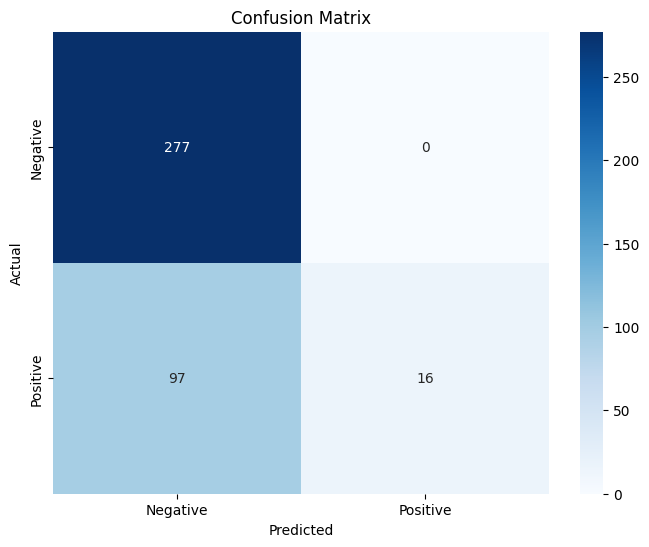

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()